# Chapter 7. 합성곱 신경망(CNN)

## 7.1 전체 구조

합성곱 신경망(convolutional neural network, CNN)은 이미지 인식과 음성 인식 등 다양한 곳에서 사용되는데, 특히 이미지 인식 분야에서 딥러닝을 활용한 기법은 거의 CNN을 기초로 한다.

CNN의 네트워크 구조에는 이전의 신경망과 같이 계층을 조합하여 만들 수 있는데, 이때 합성곱 계층(convolutional layer)과 풀링 계층(pooling layer)이 새롭게 등장한다.

지금까지의 신경망은 인접하는 계층의 모든 뉴런과 결합되어 있는 완전연결(fully-connected, 전결합)이라 하며, 완전히 연결된 계층을 Affine 계층이라는 이름으로 구현했다.


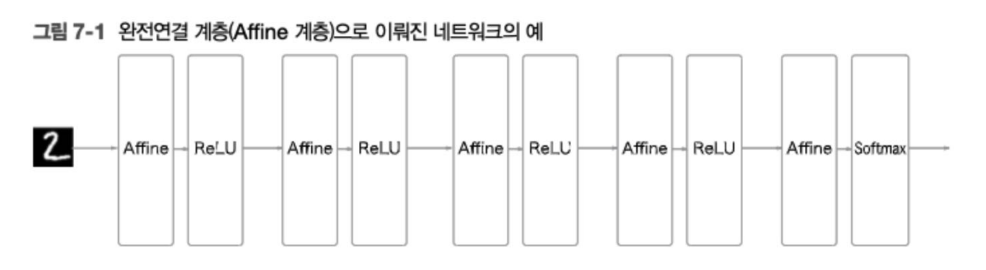

위는 Affine 계층을 사용한 층이 5개인 완전연결 신경망이다. 이는 Affine 계층 뒤에 활성화 함수를 갖는 ReLU 계층(혹은 Sigmoid 계층)이 이어진다.
- Affine-ReLU 조합 4개
- 마지막 5번째 층: Affine 계층에 이어 소프트맥스 계층에서 최종 결과(확률)를 출력




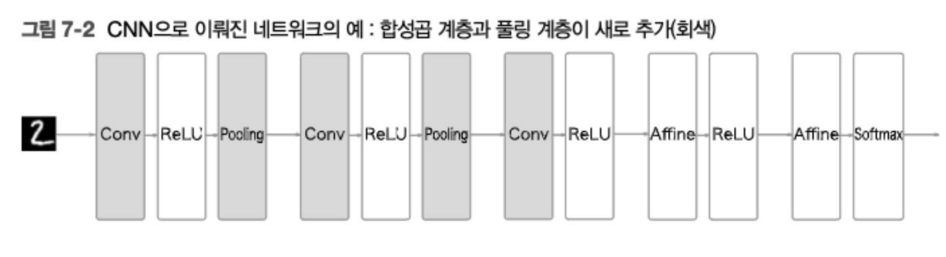

반면, 위는 새로운 '합성곱 계층(Conv)'과 '풀링 계층(Pooling)'이 추가된 CNN이다.
- CNN의 계층은 'Conv-ReLU-(Pooling)' 흐름으로 연결
- 출력에 가까운 층에서는 지금까지의 'Affine-ReLU' 구성을 사용할 수 있음
- 마지막 출력 계층에서는 'Affine-Softmax' 조합을 그대로 사용

## 7.2 합성곱 계층

### 7.2.1 완전연결 계층의 문제점



완전연결 계층의 문제점은 '데이터의 형상이 무시'된다는 사실이다. 입력 데이터가 이미지인 경우를 예로, 이미지는 세로, 가로, 채널(색상)로 구성된 3차원 데이터이다. 그러나 완전연결 계층에 입력할 때는 3차원 데이터를 평평한 1차원 데이터로 평탄화해줘야 한다.

이미지는 3차원 형상이며, 이 형상에는 공간적 정보가 담겨 있다. 예를 들어, 공간적으로 가까운 픽셀은 값이 비슷하거나, RGB의 각 채널은 서로 밀접하게 관련되어 있거나, 거리가 먼 픽셀끼리는 별 연관이 없는 등, 3차원 속에서 의미를 갖는 본질적 패턴이 숨어 있을 것. 그러나 완전연결 계층은 형상을 무시하고 모든 입력 데이터를 동등한 뉴런(같은 차원의 뉴런)으로 취급하여 형상에 담긴 정보를 살릴 수 없다.

한편, 합성곱 계층은 형상을 유지한다. 이미지도 3차원 데이터로 입력받으며, 다음 계층에도 3차원 데이터로 전달한다. 따라서 CNN은 이미지처럼 형상을 가진 데이터를 제대로 이해할 (가능성이 있는) 것이다.

- 특징 맵(feature map): 합성곱 계층의 입출력 데이터
  - 입력 특징 맵(input feature map): 합성곱 계층의 입력 데이터
  - 출력 특징 맵(output feature map): 합성곱 계층의 출력 데이터

### 7.2.2 합성곱 연산

합성곱 계층에서는 합성곱 연산을 처리하는데, 이는 이미지 처리에서 말하는 필터 연산에 해당한다. 합성곱 연산은 입력 데이터에 필터(커널)를 적용하는데, 둘다 세로가로 방향의 형상을 갖는다. 데이터와 필터의 형상을 (높이, 너비)로 표기하며, 아래의 예에서는 다음과 같이 형상이 표기된다.
- 입력: (4,4)
- 필터: (3,3)
- 출력: (2,2)

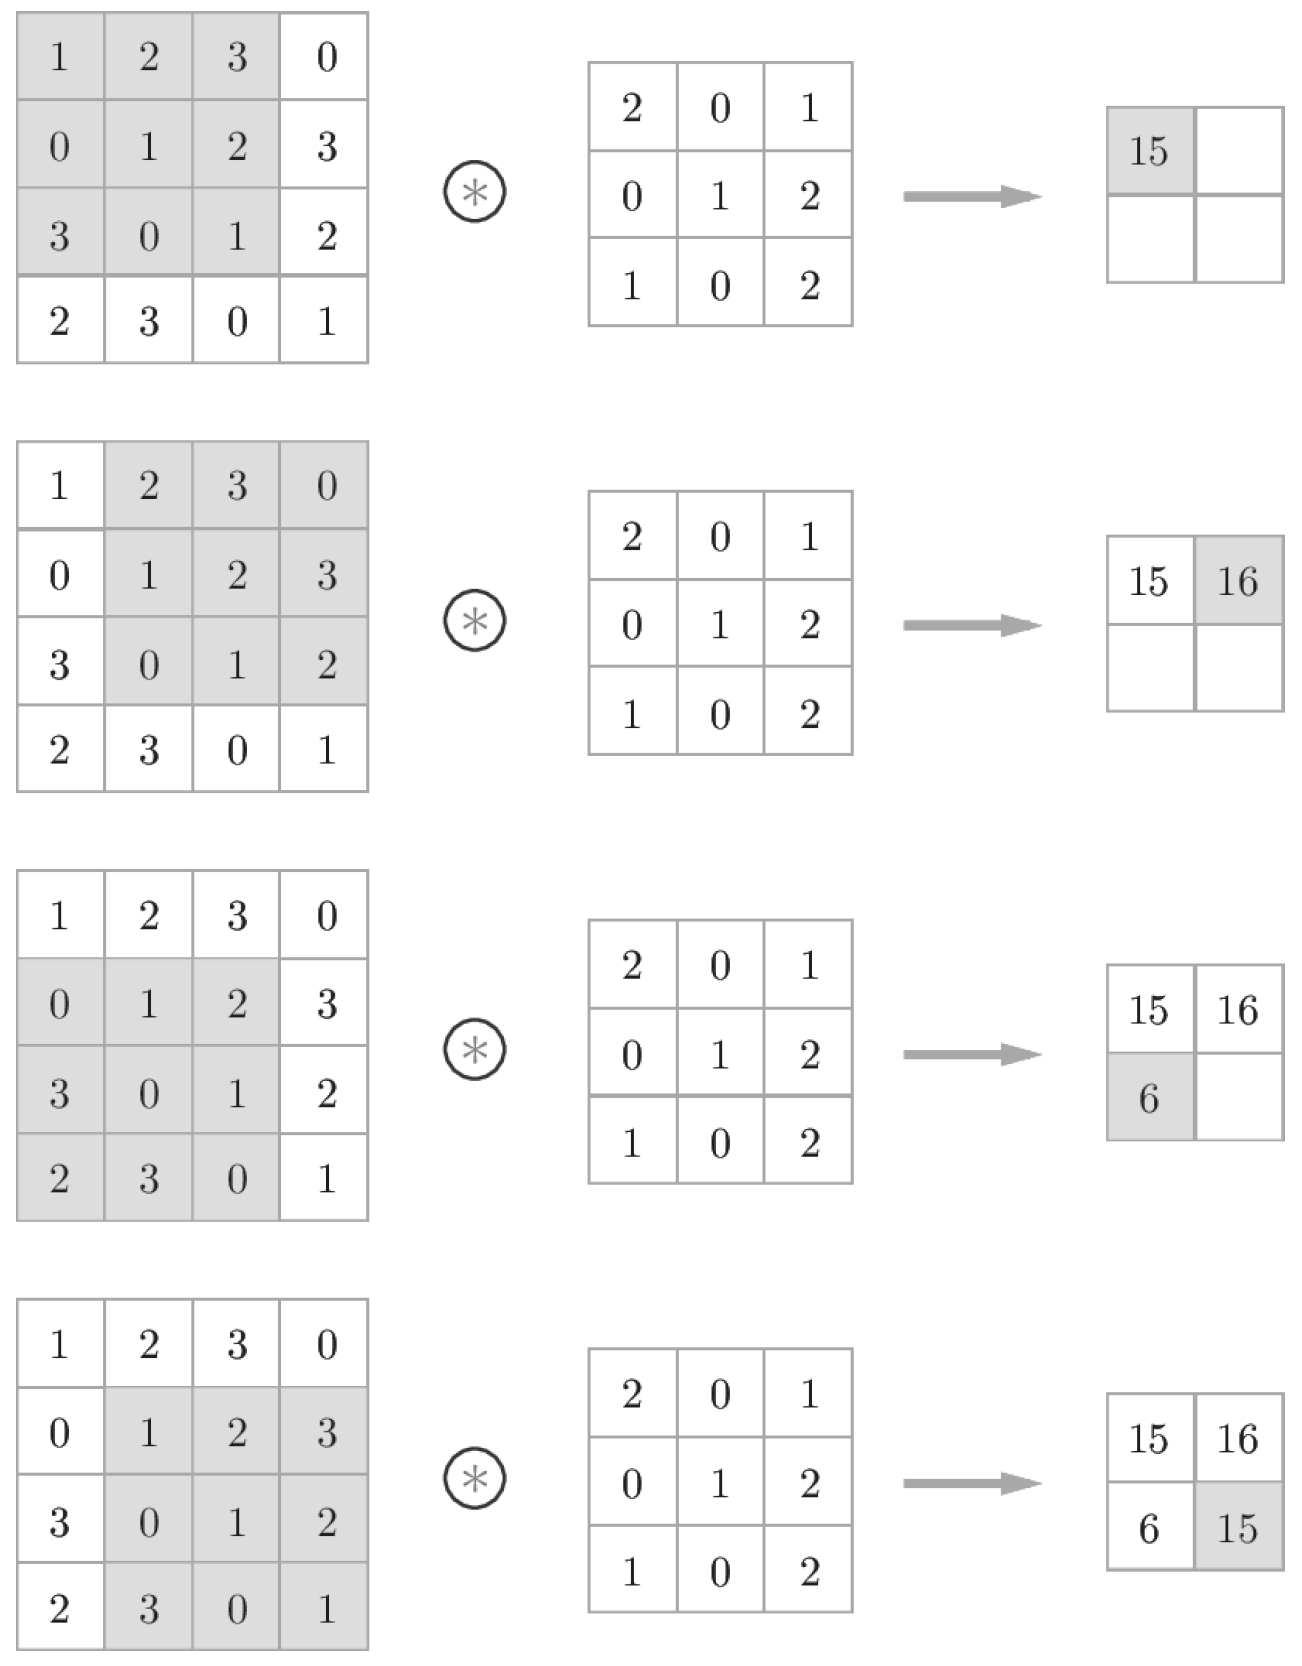

합성곱 연산은 위와 같이 필터의 윈도우(window)를 일정 간격으로 이동해가며 입력 데이터에 적용한다. (위 예에서는 회색 3x3) 입력과 필터에서 대응하는 원소끼리 곱한 후 그 총합을 구하는 단일 곱셈-누산(fused multiply-add, FMA)을 한 후, 그 결과를 출력의 해당 장소에 저장한다.

이 과정을 모든 장소에서 수행하면 합성곱 연산의 출력이 완성된다.

완전연결 신경망에는 가중치 매개변수와 편향이 존재하는데, CNN에서는 필터의 매개변수가 그동안의 '가중치'에 해당한다. 또한, CNN에도 편향이 존재한다.

위 이미지는 필터를 적용하는 단계까지만 보여준 것이고, 편향까지 포함하면 다음과 같은 흐름이 된다. 편향은 필터를 적용한 후의 데이터에 더해진다. 그리고 편향은 항상 하나(1x1)만 존재한다. 그 하나의 값을 필터를 적용한 모든 원소에 더하는 것.

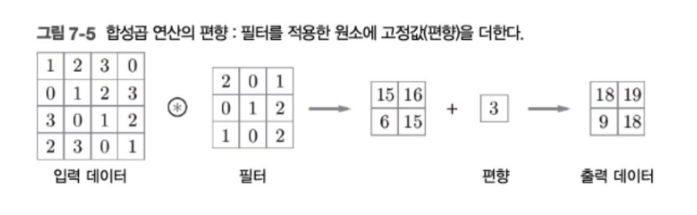

### 7.2.3 패딩

합성곱 연산을 수행하기 전에 입력 데이터 주변을 특정 값(예컨대 0)으로 채우기도 하는데, 이를 패딩(padding)이라 한다.

아래는 (4,4) 크기의 입력 데이터에 폭이 1인 패딩을 적용한 것이며, 폭 1짜리 패딩은 입력 데이터 사방 1픽셀을 특정 값으로 채우는 것이다.

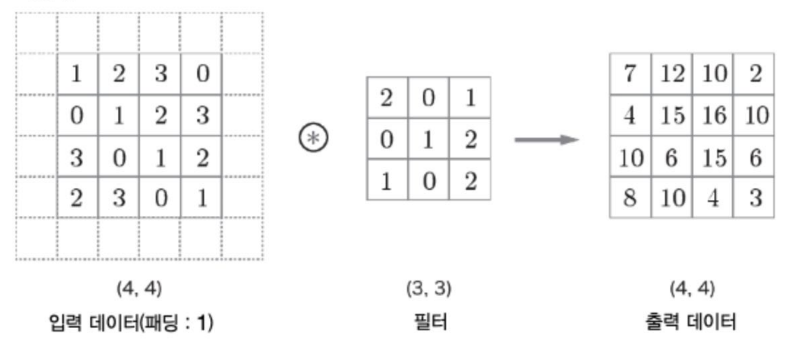

따라서 처음에 크기가 (4,4)인 입력 데이터에 패딩이 추가되어 (6,6)이 된다. 이 입력에 (3,3) 크기의 필터를 걸면 (4,4) 크기의 출력 데이터가 생성된다.


> 패딩의 목적?

합성곱 연산을 거칠 때마다 크기가 작아지면 어느 시점에서는 출력 크기가 1이 되어버릴 것. 이러면 더는 합성곱 연산을 적용할 수 없다. 이런 사태를 막기 위해 패딩을 사용하여, 입력 데이터의 공간적 크기를 고정한 채로 다음 계층에 전달하여 출력이 입력과 같은 크기로 유지시킬 수 있다.



### 7.2.4 스트라이드

필터를 적용하는 위치의 간격을 스트라이드(stride, 간격)라고 한다. 즉 윈도우를 이동하는 범위를 말한다.

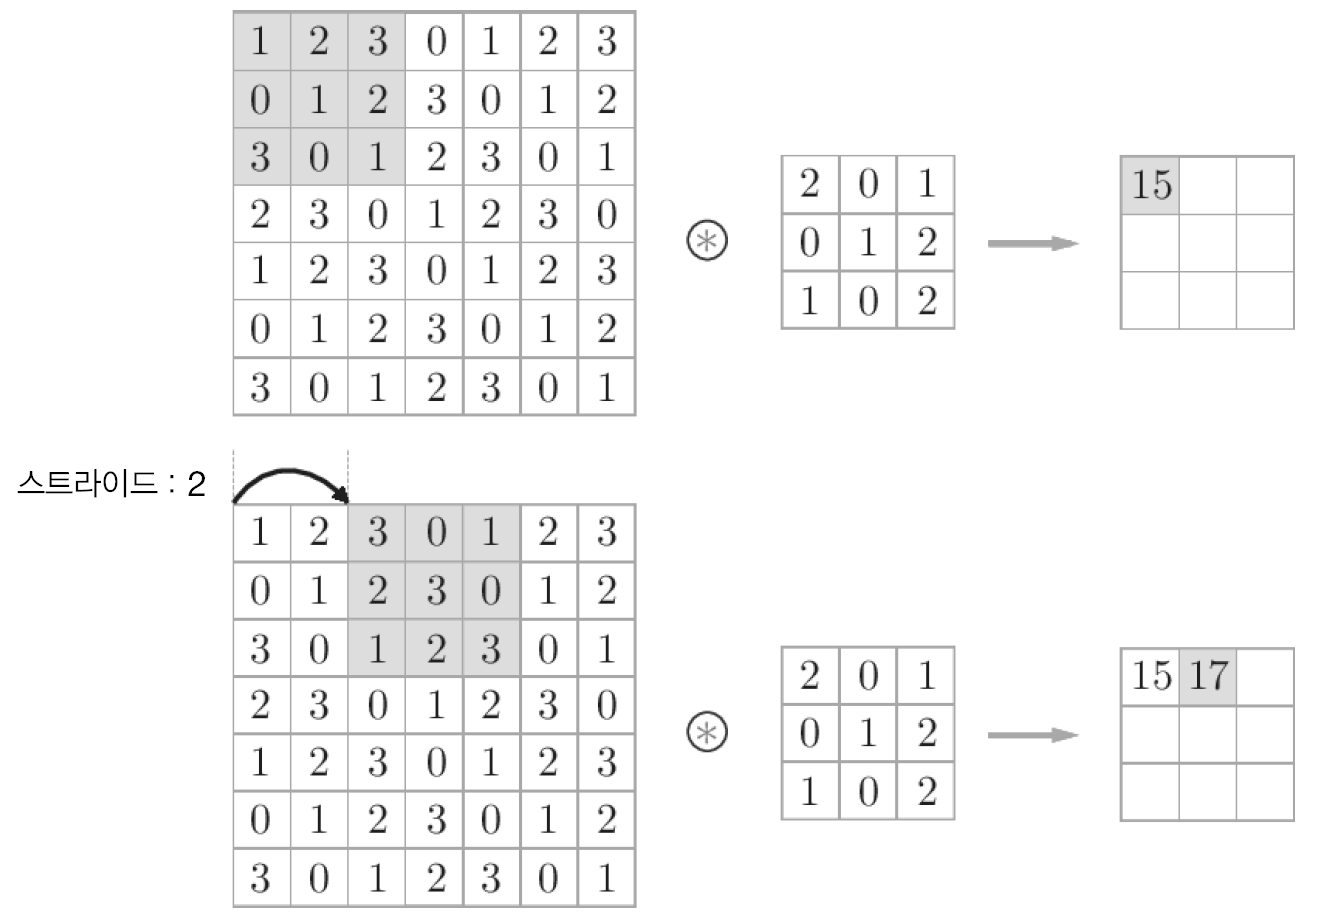

스트라이드를 키우면 출력 크기는 작아지며, 패딩을 크게 하면 출력 크기가 커진다. 이런 관계를 수식화하면 다음과 같다. (참고로, 출력 크기는 정수로 나눠떨어지는 값이어야 함. 원소의 개수이므로)
- 입력 크기: (H,W)
- 필터 크기: (FH, FW)
- 출력 크기: (OH, OW)
- 패딩: P
- 스트라이드: S

$$OH = \frac{H + 2P - FH}{S} + 1$$

$$OW = \frac{W + 2P - FW}{S} + 1$$


### 7.2.5 3차원 데이터의 합성곱 연산

지금까지 2차원 형상을 다루는 합성곱 연산을 살펴보았는데, 이미지는 3차원 데이터(세로, 가로, 채널)이므로 채널까지 고려하는 3차원 데이터를 다루는 합성곱 연산을 살펴보자.

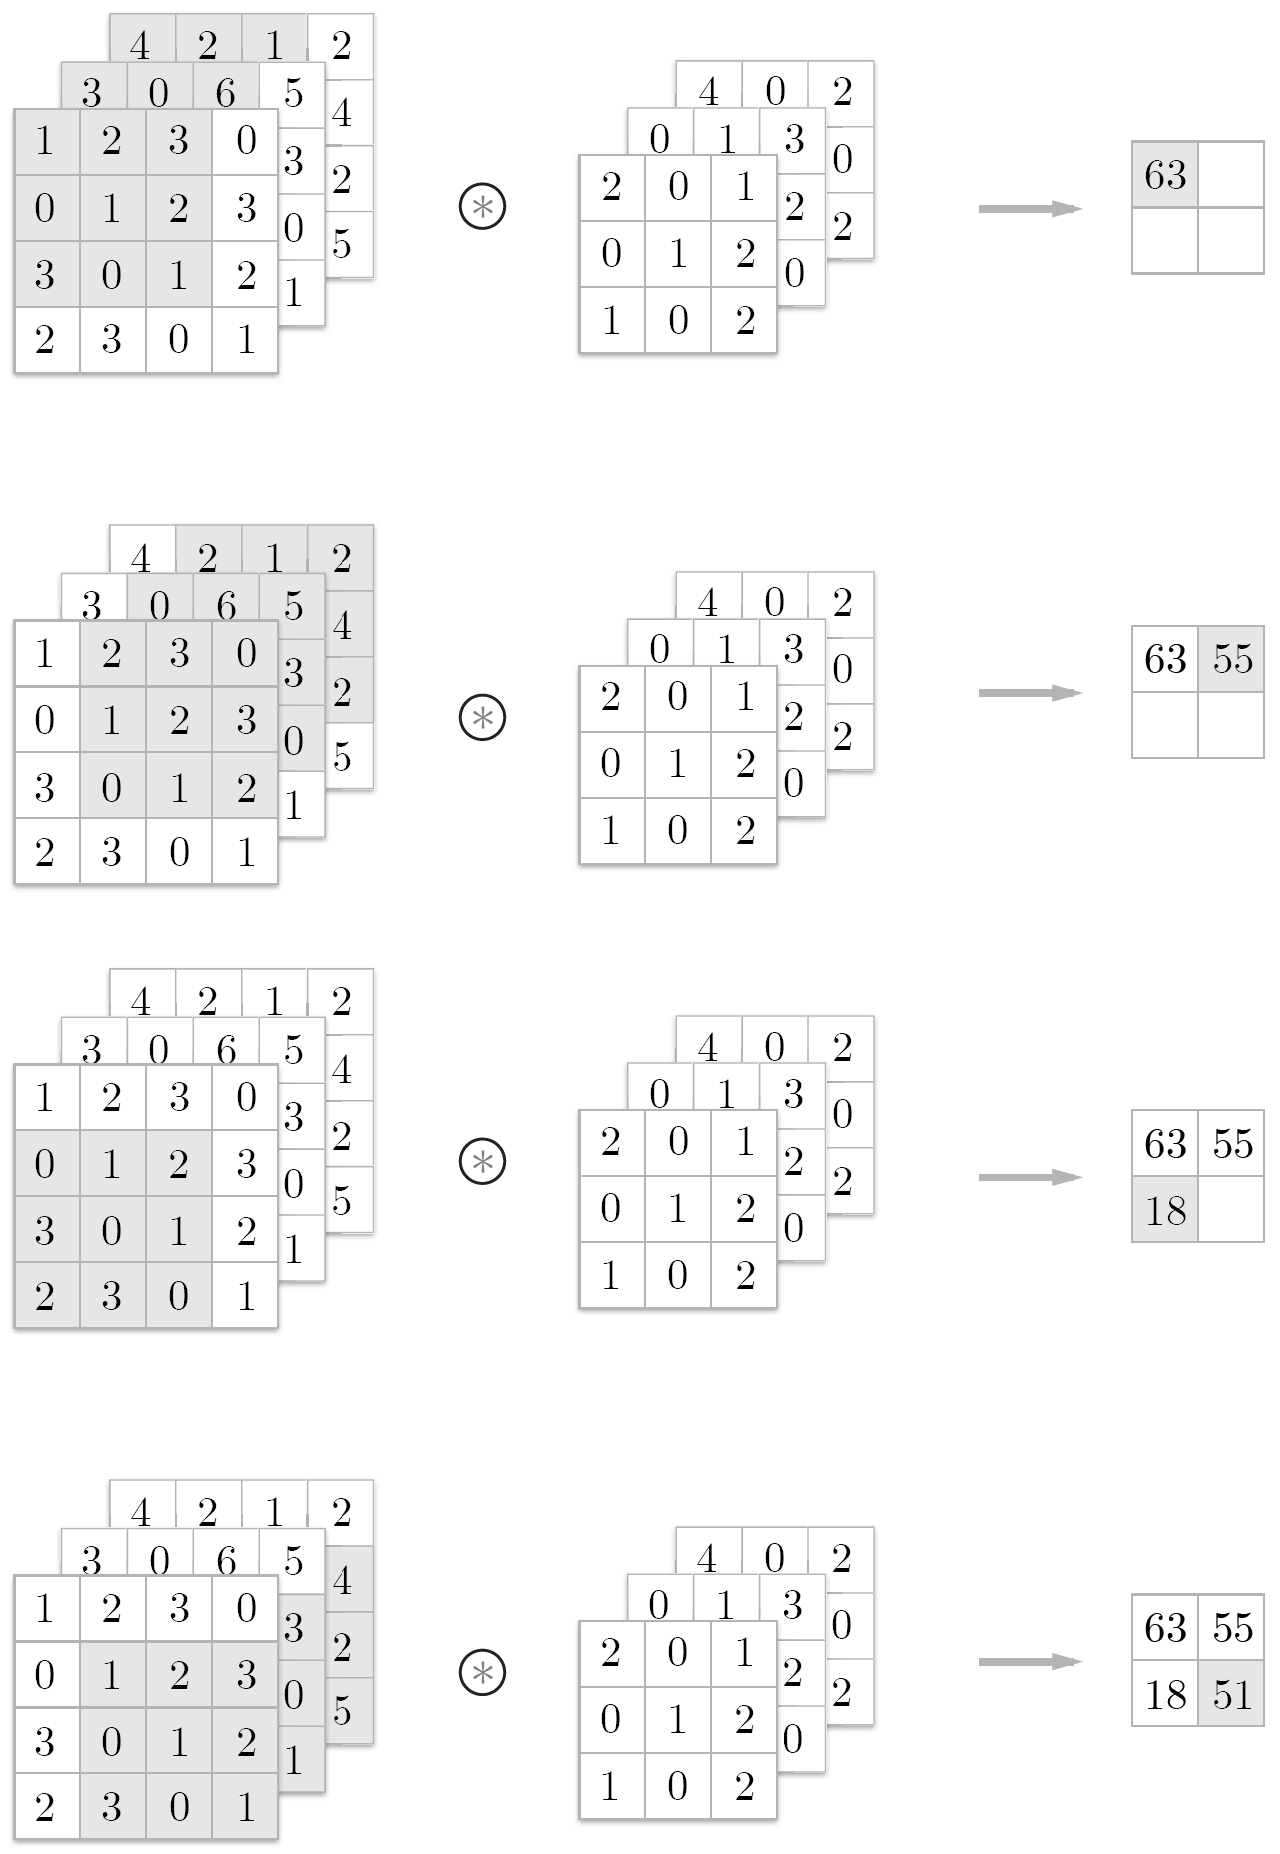

채널 쪽으로 특징 맵이 여러 개 있다면 입력 데이터와 필터의 합성곱 연산을 채널마다 수행하고, 그 결과를 더해서 하나의 출력을 얻는다.

3차원의 합성곱 연산에서 주의할 점은 입력 데이터의 채널 수와 필터의 채널 수가 같아야 한다는 것이다. 한편, 필터 자체의 크기는 원하는 값으로 설정할 수 있다.(단, 모든 채널의 필터가 같은 크기여야 한다.)

### 7.2.6 블록으로 생각하기

3차원의 합성곱 연산은 데이터와 필터를 3차원 직육면체 블록이라 생각하면 쉽다. 3차원 데이터를 다차원 배열로 나타낼 때는
- (채널 수 C, 높이 H, 너비 W) 순서로 사용
- 필터도 (C, FH, FW)

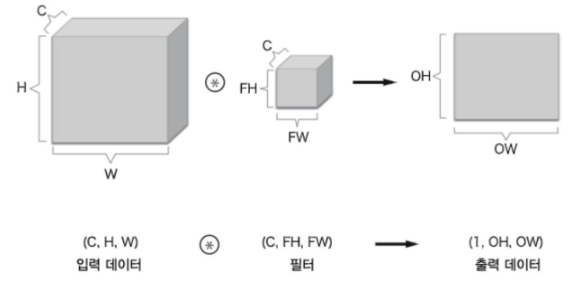

위를 보면 출력 데이터는 한 장의 특징 맵이 나온다. (즉, 채널이 1개인 특징 맵) 그렇다면 합성곱 연산의 출력으로 다수의 채널을 내보내려면 어떻게 해야 할까?

답은 필터(가중치)를 다수 사용하는 것.

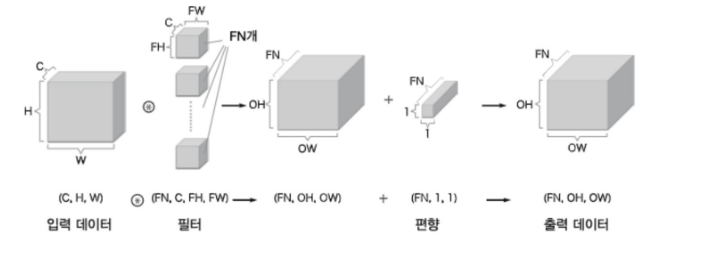

위 그림과 같이 필터를 FN개 적용하면 출력 맵도 FN개가 생성된다. 그리고 이 FN개의 맵을 모으면 형상이 (FN, OH, OW)인 블록이 완성되며, 이 완성된 블록을 다음 계층으로 넘기겠다는 것이 CNN의 처리 흐름.

합성곱 연산에는 필터의 수도 고려해야 하는데, 필터의 가중치 데이터는 4차원 데이터이며 (출력 채널 수, 입력 채널 수, 높이, 너비) 순.

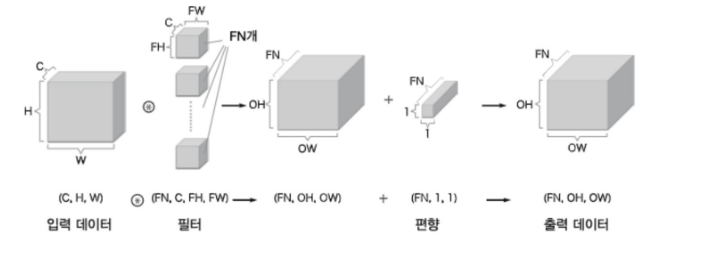

또한, 편향도 쓰인다. 편향은 채널 하나에 값 하나씩으로 구성된다.
- 편향의 형상: (FN, 1, 1)
- 필터의 출력 결과의 형상: (FN, OH, OW)

이 두 블록을 더하면 편향의 각 값이 필터의 출력이 (FN, OH, OW) 블록의 대응 채널의 원소 모두에 더해진다.

### 7.2.7 배치 처리

신경망에서의 입력 데이터를 배치 처리한 것과 마찬가지로  합성곱 연산에서도 지원한다.
각 게층을 흐르는 데이터의 차원을 하나 늘려 4차원 데이터 (데이터 수, 채널 수, 높이, 너비) 로 저장한다.

각 데이터의 선두에 배치용 차원을 추가함으로써, 데이터는 4차원 형상을 가진 채 각 계층을 타고 흐른다. 주의할 점으로 신경망에 4차원 데이터가 하나 흐를 때마다 데이터 N개에 대한 합성곱 연산이 이뤄진다는 것. (N회 분의 처리를 한 번에 수행)

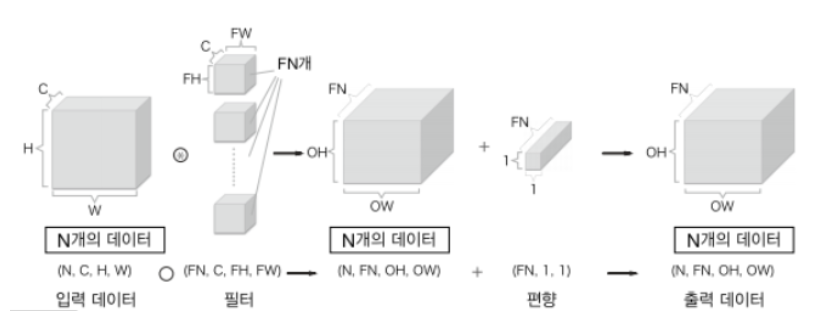

## 7.3 풀링 계층

풀링은 세로, 가로 방향의 공간을 줄이는 연산. 아래와 같이 2x2 영역을 원소 하나로 집약하여 공간 크기를 줄임.

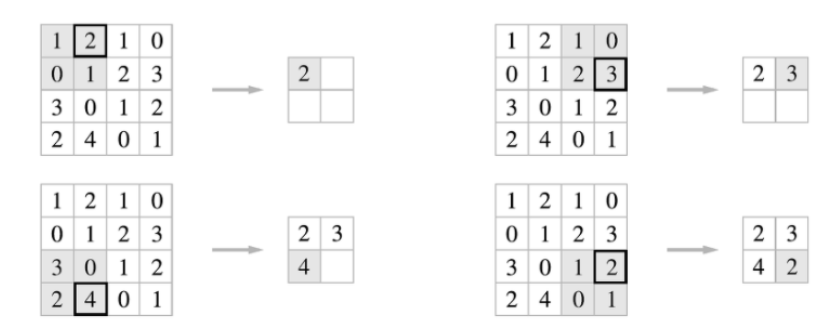

위는 최대 풀링(max pooling)을 스트라이드 2로 처리하는 순서이다.
- 최대 풀링은 최댓값을 구하는 연산으로, '2x2'의 대상 영역의 크기에서 가장 큰 원소 하나를 꺼낸다.
- 스트라이드 2는 2x2 윈도우가 원소 2칸 간격으로 이동하는 것.
- 보통 윈도우 크기와 스트라이드는 같은 값으로 설정함

주로 이미지 인식 분야에서는 최대 풀링을 사용한다. 추가적으로, 평균 풀링(average pooling) 등이 있는데, 이는 대상 영역의 평균을 계산한다.

### 7.3.1 풀링 계층의 특징

1. 학습해야 할 매개변수가 없다
  - 풀링 계층은 합성곱 계층과 달리 학습해야 할 매개변수가 없다. (풀링은 대상 영역에서 최댓값이나 평균을 취하는 명확한 처리이므로) **이해...안됨**
2. 채널 수가 변하지 않는다.
  - 풀링 연산은 입력 데이터의 채널 수 그대로 출력 데이터로 내보낸다. 채널마다 독립적으로 계산하기 때문
3. 입력의 변화에 영향을 적게 받는다(강건하다)
  - 입력 데이터가 조금 변해도 풀링의 결과는 잘 변하지 않는다.


## 7.4 합성곱/풀링 계층 구현하기

### 7.4.1 4차원 배열

In [ ]:
import numpy as np
x = np.random.rand(10, 1, 28, 28) # 높이 28, 너비 28, 채널 1개인 데이터가 10개
x.shape

(10, 1, 28, 28)

In [ ]:
print(x[0].shape)
print(x[1].shape)

(1, 28, 28)
(1, 28, 28)


In [ ]:
# 첫 번째 데이터의 첫 채널의 공간 데이터에 접근
x[0, 0] # 또는 x[0][0]

array([[0.64816695, 0.42319866, 0.59300313, 0.89863317, 0.0543672 ,
        0.42968163, 0.99587747, 0.64322638, 0.68803347, 0.3829482 ,
        0.12514361, 0.10155643, 0.46339064, 0.6550369 , 0.52041227,
        0.69084077, 0.24421223, 0.94566405, 0.22959036, 0.08937833,
        0.69207646, 0.50889882, 0.53858323, 0.03488675, 0.30750927,
        0.89308158, 0.69684627, 0.00203923],
       [0.80177176, 0.20001352, 0.3358533 , 0.18470273, 0.29095804,
        0.88423776, 0.14953286, 0.82571133, 0.70485428, 0.15828907,
        0.42111968, 0.56749108, 0.56704999, 0.49497921, 0.07528966,
        0.36998924, 0.8849393 , 0.56032843, 0.78178696, 0.87269227,
        0.1694    , 0.18130237, 0.12332796, 0.24354546, 0.71882904,
        0.04402294, 0.6098319 , 0.50993415],
       [0.84399211, 0.7106654 , 0.18618785, 0.87885652, 0.26687207,
        0.28355067, 0.1324342 , 0.17805252, 0.33656336, 0.74166818,
        0.7821353 , 0.64420165, 0.92544014, 0.07581758, 0.67373509,
        0.22859203, 0.1966

### 7.4.2 im2col로 데이터 전개하기

im2col은 입력 데이터를 필터링(가중치 계산)하기 좋게 전개하는(펼치는) 함수다.

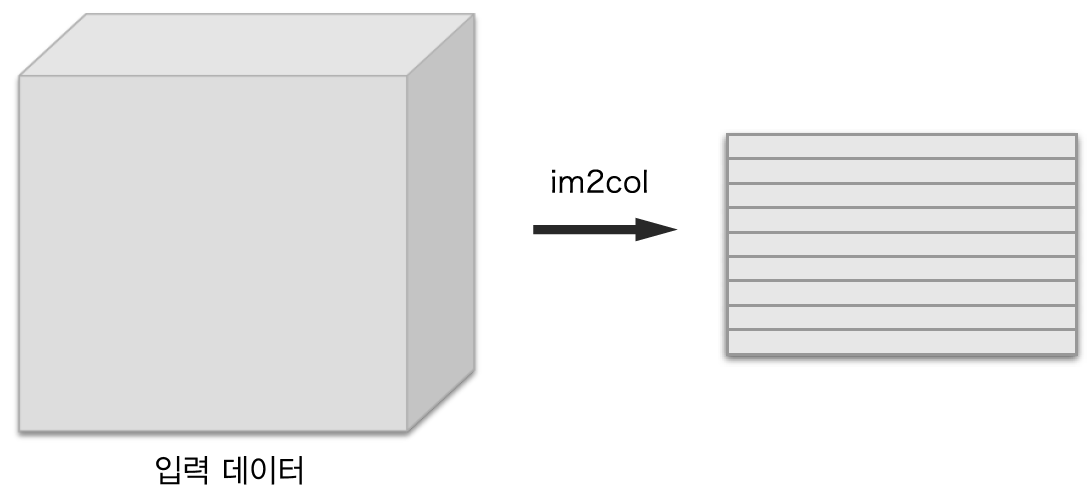

위는 3차원 입력 데이터에 im2col을 적용하면 2차원 행렬로 바뀌는 것을 보여준다. (정확히는 배치 안의 데이터 수까지 포함한 4차원 데이터를 2차원으로 변환함)

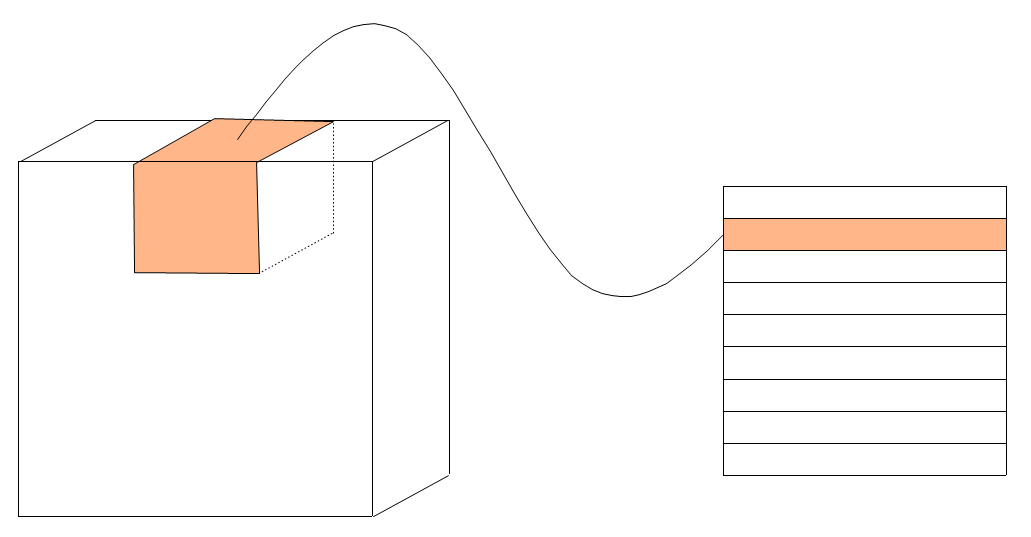

위는 입력 데이터에서 필터를 적용하는 영역(3차원 블록)을 한 줄로 늘어놓는 것을 보여준다. 이 전개를 필터를 적용하는 모든 영역에서 수행하는 게 im2col(image to column)이다. 필터 적용 영역을 앞에서부터 순서대로 1줄로 펼친다.

위에서는 보기에 좋게끔 스트라이드를 크게 잡아 필터의 적용 영역이 겹치지 않도록 했지만, 실제 상황에서는 영역이 겹치는 경우가 대부분이다.

겹치게 되면 im2col로 전개한 후의 원소 수가 원래 블록의 원소 수보다 많아지기 때문에 im2col을 사용해 구현하면 메모리를 더 많이 소비하는 단점이 있다. 하지만 컴퓨터는 큰 행렬을 묶어서 계산하는 데 탁월하기에 문제를 행렬 계산으로 만들면 선형 대수 라이브러리를 활용해 효율을 높일 수 있다.

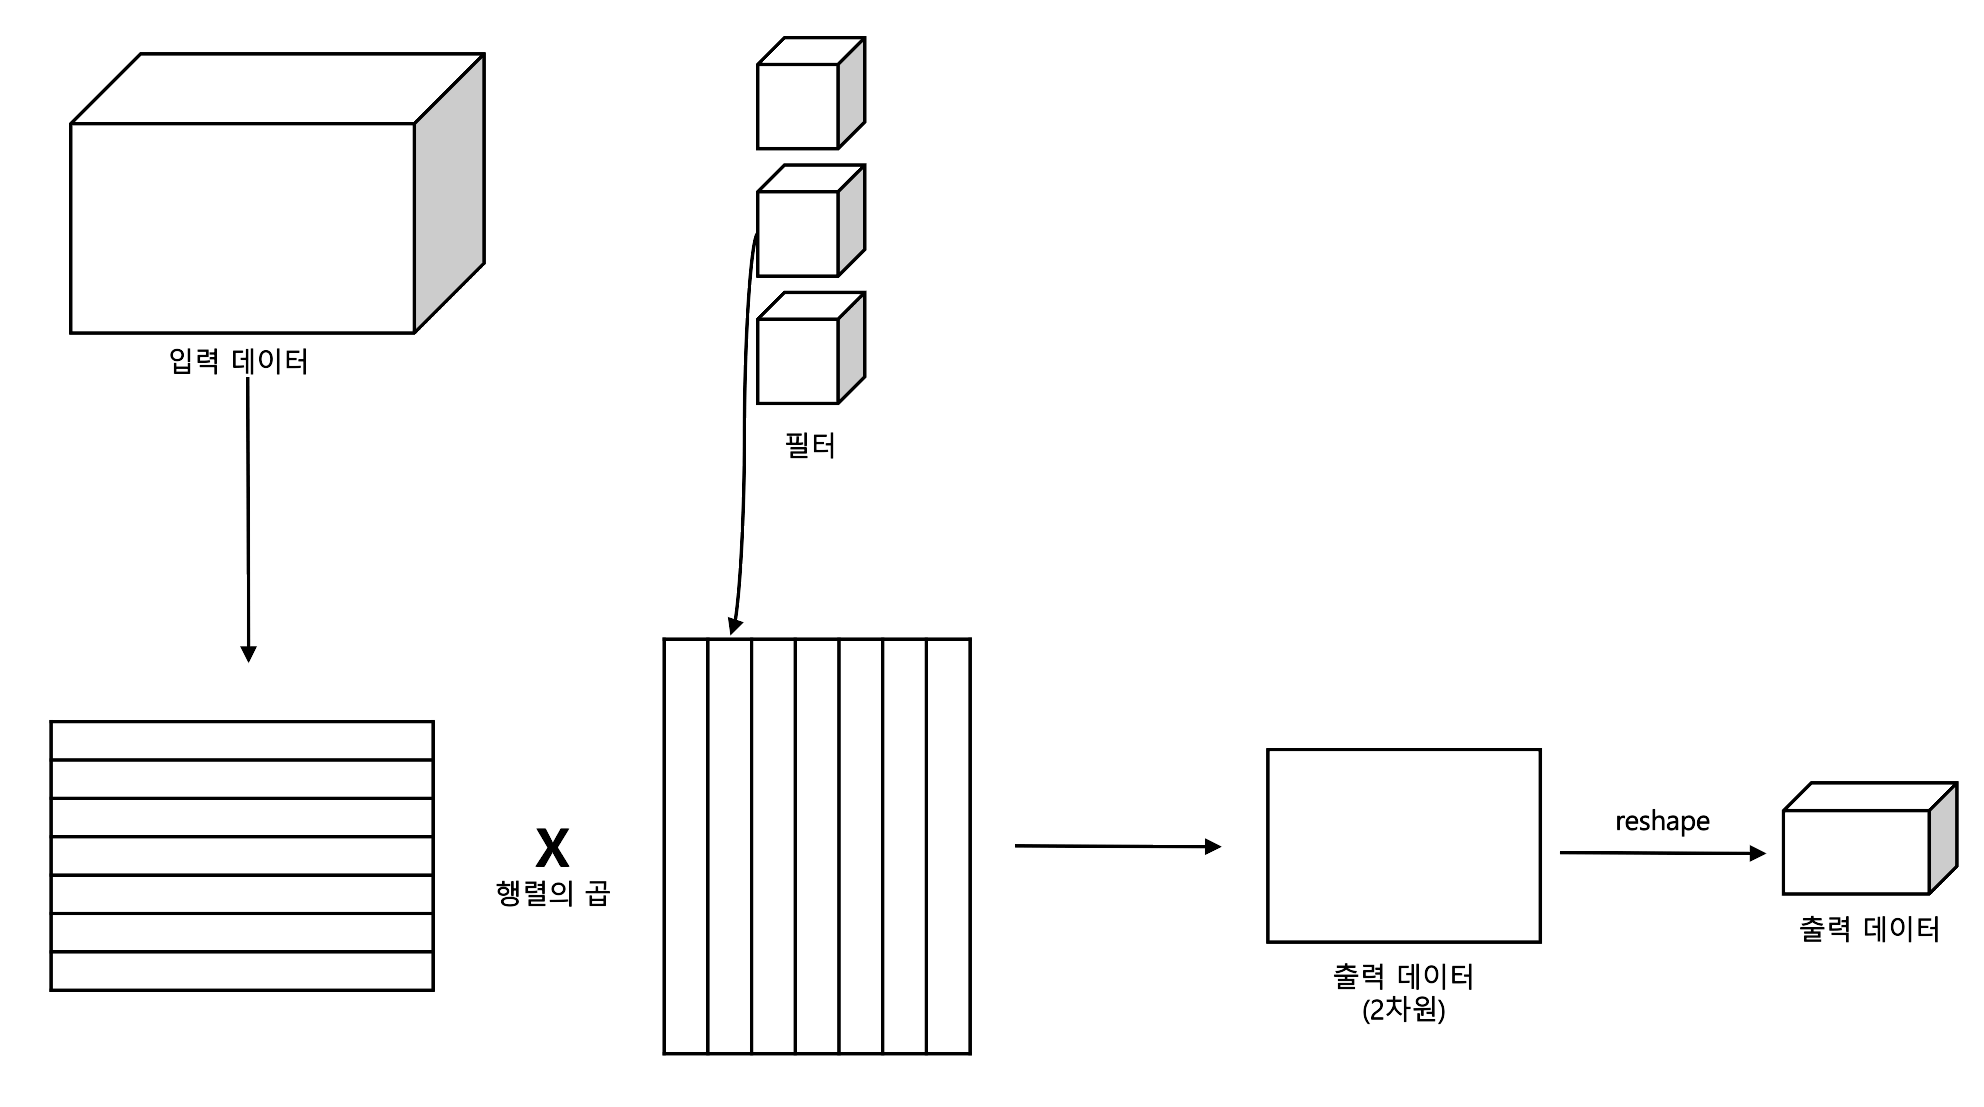

합성곱 계층의 구현 흐름 과정은 위와 같다.
1. im2col로 입력 데이터 전개
2. 합성곱 계층의 필터(가중치)를 1열로 (세로) 전개
3. 두 행렬의 곱 계산 (im2col이 전개한 데이터와 행렬의 곱 계산)
4.출력 데이터를 변형(reshape)

결과는 2차원 행렬이다. CNN은 데이터를 4차원 배열로 저장하므로 2차원인 출력 데이터를 4차원으로 변형(reshape)하는 것이다.

### 7.4.3 합성곱 계층 구현하기

In [ ]:
# coding: utf-8
import numpy as np


def smooth_curve(x):
    """손실 함수의 그래프를 매끄럽게 하기 위해 사용

    참고：http://glowingpython.blogspot.jp/2012/02/convolution-with-numpy.html
    """
    window_len = 11
    s = np.r_[x[window_len-1:0:-1], x, x[-1:-window_len:-1]]
    w = np.kaiser(window_len, 2)
    y = np.convolve(w/w.sum(), s, mode='valid')
    return y[5:len(y)-5]


def shuffle_dataset(x, t):
    """데이터셋을 뒤섞는다.

    Parameters
    ----------
    x : 훈련 데이터
    t : 정답 레이블

    Returns
    -------
    x, t : 뒤섞은 훈련 데이터와 정답 레이블
    """
    permutation = np.random.permutation(x.shape[0])
    x = x[permutation, :] if x.ndim == 2 else x[permutation, :, :, :]
    t = t[permutation]

    return x, t

def conv_output_size(input_size, filter_size, stride=1, pad=0):
    return (input_size + 2*pad - filter_size) / stride + 1


def im2col(input_data, filter_h, filter_w, stride=1, pad=0):
    """다수의 이미지를 입력받아 2차원 배열로 변환한다(평탄화).

    Parameters
    ----------
    input_data : 4차원 배열 형태의 입력 데이터(이미지 수, 채널 수, 높이, 너비)
    filter_h : 필터의 높이
    filter_w : 필터의 너비
    stride : 스트라이드
    pad : 패딩

    Returns
    -------
    col : 2차원 배열
    """
    N, C, H, W = input_data.shape
    out_h = (H + 2*pad - filter_h)//stride + 1
    out_w = (W + 2*pad - filter_w)//stride + 1

    img = np.pad(input_data, [(0,0), (0,0), (pad, pad), (pad, pad)], 'constant')
    col = np.zeros((N, C, filter_h, filter_w, out_h, out_w))

    for y in range(filter_h):
        y_max = y + stride*out_h
        for x in range(filter_w):
            x_max = x + stride*out_w
            col[:, :, y, x, :, :] = img[:, :, y:y_max:stride, x:x_max:stride]

    col = col.transpose(0, 4, 5, 1, 2, 3).reshape(N*out_h*out_w, -1)
    return col


def col2im(col, input_shape, filter_h, filter_w, stride=1, pad=0):
    """(im2col과 반대) 2차원 배열을 입력받아 다수의 이미지 묶음으로 변환한다.

    Parameters
    ----------
    col : 2차원 배열(입력 데이터)
    input_shape : 원래 이미지 데이터의 형상（예：(10, 1, 28, 28)）
    filter_h : 필터의 높이
    filter_w : 필터의 너비
    stride : 스트라이드
    pad : 패딩

    Returns
    -------
    img : 변환된 이미지들
    """
    N, C, H, W = input_shape
    out_h = (H + 2*pad - filter_h)//stride + 1
    out_w = (W + 2*pad - filter_w)//stride + 1
    col = col.reshape(N, out_h, out_w, C, filter_h, filter_w).transpose(0, 3, 4, 5, 1, 2)

    img = np.zeros((N, C, H + 2*pad + stride - 1, W + 2*pad + stride - 1))
    for y in range(filter_h):
        y_max = y + stride*out_h
        for x in range(filter_w):
            x_max = x + stride*out_w
            img[:, :, y:y_max:stride, x:x_max:stride] += col[:, :, y, x, :, :]

    return img[:, :, pad:H + pad, pad:W + pad]

In [ ]:
im2col(input_data, filter_h, filter_w, stride=1, pad=0)

In [ ]:
import sys, os
sys.path.append(os.pardir)
# from common.util import im2col

x1 = np.random.rand(1, 3, 7, 7) # (데이터 수, 채널 수, 높이, 너비)
col1 = im2col(x1, 5, 5, stride=1, pad=0)
print(col1.shape) # (9, 75)

x2 = np.random.rand(10, 3, 7, 7) # 데이터 10개
col2 = im2col(x2, 5, 5, stride=1, pad=0)
print(col2.shape) # (90, 75)

위에서는 2가지 예를 보여주고 있다.
- 첫 번째: 배치 크기가 1 (데이터 1개), 채널 3개, 높이와 너비는 7x7
- 두 번째: 배치 크기가 10, 나머지는 첫 번째와 동일
- im2col 함수를 적용한 두 경우 모두 2번째 차원의 원소는 75개인데, 이 값은 필터의 원소 수와 같음(채널 3개, 5x5 데이터)
- 배치 크기가 1일 때는 im2col의 결과의 크기가 (9, 75)이고, 10일 때는 그 10배인 (90, 75) 크기의 데이터가 저장됨

In [ ]:
# im2col을 사용하여 합성곱 계층 구현

class Convolution:
    def __init__(self, W, b, stride=1, pad=0):
        self.W = W
        self.b = b
        self.stride = stride
        self.pad = pad

    def forward(self, x):
        FN, C, FH, FW = self.W.shape
        N, C, H, W = x.shape
        out_h = int(1 + (H + 2*self.pad - FH) / self.stride)
        out_w = int(1 + (W + 2*self.pad - FW) / self.stride)

        # 중요
        col = im2col(x, FH, FW, self.stride, self.pad)
        # reshape에 -1을 지정하면 다차원 배열의 원소 수가 변환 후에도 똑같이 유지되도록 적절히 묶어줌
        col_W = self.W.reshape(FN, -1).T # 필터 전개
        out = np.dot(col, col_W) + self.b

        # transpose는 다차원 배열의 축 순서를 바꿔줌 (출력 데이터를 적절한 형상으로 바꿈)
        out = out.reshape(N, out_h, out_w, -1).transpose(0, 3, 1, 2)

        return out

- 합성곱 계층은 필터(가중치), 편향, 스트라이드, 패딩을 인수로 받아 초기화
  - 필터: (필터 개수 FN, 채널 C, 필터 높이 FH, 필터 너비 FW) 4차원 형상
- 중요 부분은 입력 데이터를 im2col로 전개하고 필터도 reshape으로 2차원 배열로 전개한다. 이후 전개한 두 행렬의 곱을 구한다.
- (10, 3, 5, 5) 형상을 한 다차원 배열 W의 원소 수는 750개인데, 이 배열에 reshape(10, -1)을 호출하면 750개의 원소를 10묶음으로, 즉 형상이 (10, 75)인 배열로 만들어준다.
- forward 구현에서는 출력 데이터를 적절한 형상으로 바꿔줌.

주의할 점으로, 합성곱 계층의 역전파에서는 im2col을 역으로 처리해야 하는데 이는 col2im 함수를 사용하면 된다.

In [ ]:
def im2col(input_data, filter_h, filter_w, stride=1, pad=0):
    """다수의 이미지를 입력받아 2차원 배열로 변환한다(평탄화).

    Parameters
    ----------
    input_data : 4차원 배열 형태의 입력 데이터(이미지 수, 채널 수, 높이, 너비)
    filter_h : 필터의 높이
    filter_w : 필터의 너비
    stride : 스트라이드
    pad : 패딩

    Returns
    -------
    col : 2차원 배열
    """
    N, C, H, W = input_data.shape
    out_h = (H + 2*pad - filter_h)//stride + 1
    out_w = (W + 2*pad - filter_w)//stride + 1

    img = np.pad(input_data, [(0,0), (0,0), (pad, pad), (pad, pad)], 'constant')
    col = np.zeros((N, C, filter_h, filter_w, out_h, out_w))

    for y in range(filter_h):
        y_max = y + stride*out_h
        for x in range(filter_w):
            x_max = x + stride*out_w
            col[:, :, y, x, :, :] = img[:, :, y:y_max:stride, x:x_max:stride]

    col = col.transpose(0, 4, 5, 1, 2, 3).reshape(N*out_h*out_w, -1)
    return col


def col2im(col, input_shape, filter_h, filter_w, stride=1, pad=0):
    """(im2col과 반대) 2차원 배열을 입력받아 다수의 이미지 묶음으로 변환한다.

    Parameters
    ----------
    col : 2차원 배열(입력 데이터)
    input_shape : 원래 이미지 데이터의 형상（예：(10, 1, 28, 28)）
    filter_h : 필터의 높이
    filter_w : 필터의 너비
    stride : 스트라이드
    pad : 패딩

    Returns
    -------
    img : 변환된 이미지들
    """
    N, C, H, W = input_shape
    out_h = (H + 2*pad - filter_h)//stride + 1
    out_w = (W + 2*pad - filter_w)//stride + 1
    col = col.reshape(N, out_h, out_w, C, filter_h, filter_w).transpose(0, 3, 4, 5, 1, 2)

    img = np.zeros((N, C, H + 2*pad + stride - 1, W + 2*pad + stride - 1))
    for y in range(filter_h):
        y_max = y + stride*out_h
        for x in range(filter_w):
            x_max = x + stride*out_w
            img[:, :, y:y_max:stride, x:x_max:stride] += col[:, :, y, x, :, :]

    return img[:, :, pad:H + pad, pad:W + pad]

### 7.4.4 풀링 계층 구현하기

풀링 계층 구현도 합성곱 계층과 마찬가지로 im2col 사용해 입력 데이터를 전개하는데, 단 풀링의 경우에는 채널 쪽이 독립적이라는 점이 합성곱 계층과 다르다.

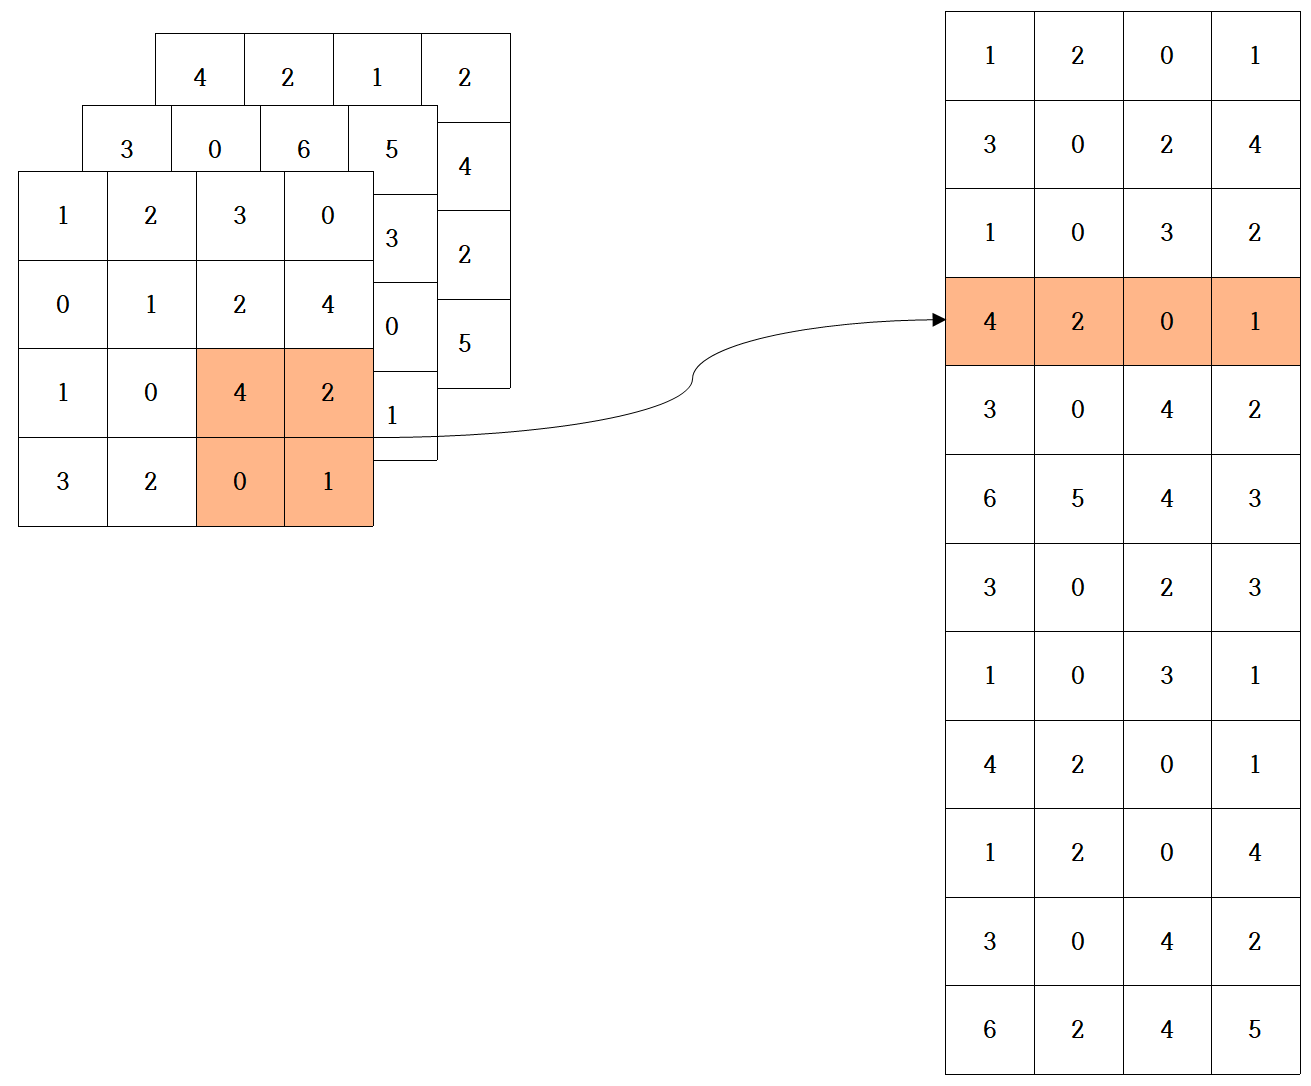

위는 채널 1, 2, 3을 전개한 것이다. 아래는 전개한 행렬에서 행별 최댓값을 구하고 적절한 형상으로 성형하는 것. (풀링 적용 영역에서 가장 큰 원소를 회색으로 표시)

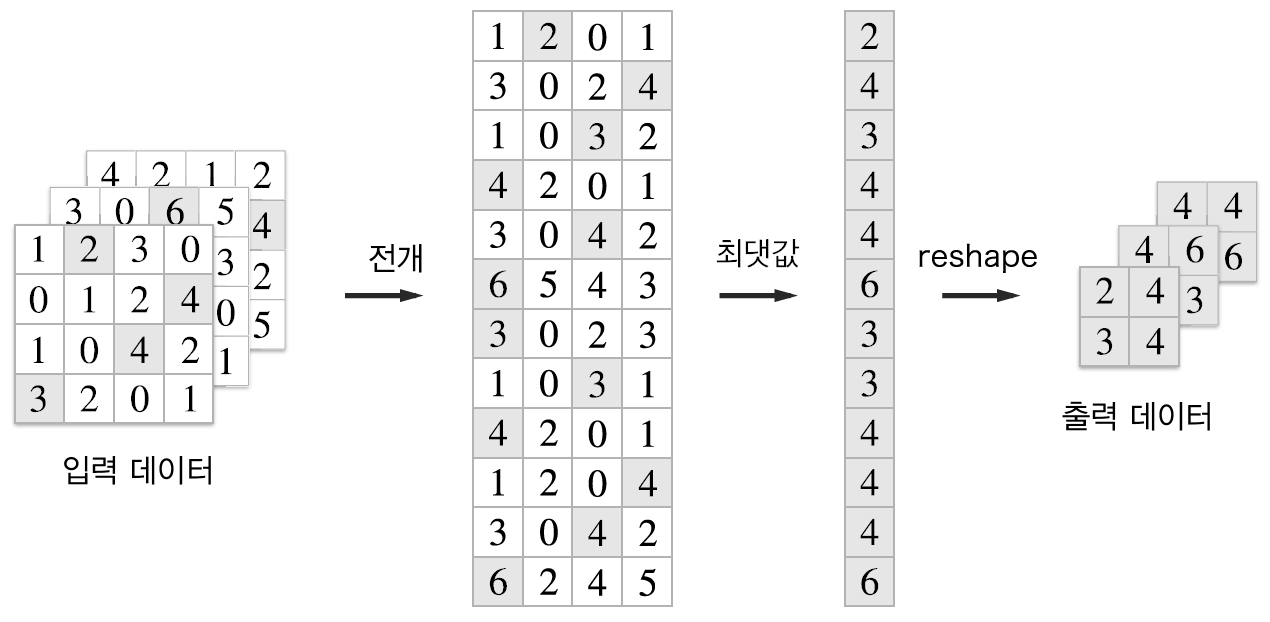

이상이 풀링 계층의 forward 처리 흐름. 다음은 이를 파이썬으로 구현한 코드다.

In [ ]:
class Pooling:
  def __init__(self, pool_h, pool_w, stride=1, pad=0):
    self.pool_h = pool_h
    self.pool_w = pool_w
    self.stride = stride
    self.pad = pad

  def forward(self, x):
    N, C, H, W = x.shape
    out_h = int(1 + (H - self.pool_h) / self.stride)
    out_w = int(1 + (W - self.pool_w) / self.stride)

    # 전개 (1) : 입력 데이터를 전개한다.
    col = im2col(x, self.pool_h, self.pool_w, self.stride, self.pad)
    col = col.reshape(-1, self.pool_h*self.pool_w)

    # 최댓값 (2) : 행별 최댓값을 구한다.
    out = np.max(col, axis=1) # 입력 x의 1번째 차원의 축마다 최댓값을 구함

    # 성형 (3) : 적절한 모양으로 성형한다.
    out = out.reshape(N, out_h, out_w, C).transpose(0, 3, 1, 2)

    return out

## 7.5 CNN 구현하기

CNN 네트워크는 'Convolution-ReLU-Pooling-Affine-ReLU-Affine-Softmax' 순으로 흐른다.

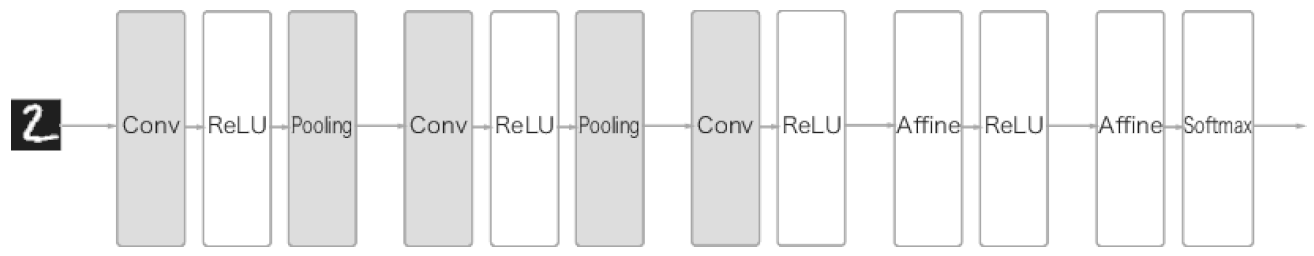

초기화 때 받는 인수
- input_dim: 입력 데이터(채널 수, 높이, 너비)의 차원
- conv_param: 합성곱 계층의 하이퍼파라미터(딕셔너리). 딕셔너리의 키는 다음과 같다.
  - filter_num: 필터 수
  - filter_Size: 필터 크기
  - stride: 스트라이드
  - pad: 패딩
  - hidden_size: 은닉층(완전연결)의 뉴런 수
  - output_size: 출력층(완전연결)의 뉴런 수
  - weight_init_std: 초기화 때의 가중치 표준편차

합성곱 계층의 하이퍼파라미터는 딕셔너리 형태로 주어진다(conv_param). 이것은 필요한 하이퍼파라미터의 값이 예컨대 {'filter_num':30, 'filter_size':5, 'pad':0, 'stride':1}처럼 저장된다는 뜻.

In [ ]:
class SimpleConvNet:
  def __init__(self, input_dim=(1, 28, 28),
               conv_param={'filter_num':30, 'filter_size':5,
                           'pad':0, 'stride':1},
               hidden_size=100, output_size=10, weight_init_std=0.01):
    filter_num = conv_param['filter_num']
    filter_size = conv_param['filter_size']
    filter_pad = conv_param['pad']
    filter_stride = conv_param['stride']
    input_size = input_dim[1]
    conv_output_size = (input_size - filter_size + 2*filter_pad) / filter_stride + 1
    pool_output_size = int(filter_num * (conv_output_size/2) * (conv_output_size/2))

여기에서는 초기화 인수로 주어진 합성곱 계층의 하이퍼파라미터를 딕셔너리에서 꺼낸다(나중에 쓰기 쉽도록). 그리고 합성곱 계층의 출력 크기를 계산한다. 이어서 다음 코드는 가중치 매개변수를 초기화하는 부분.

In [ ]:
    self.params = {}
    self.params['W1'] = weight_init_std * \
                      np.random.randn(filter_num, input_dim[0], filter_size, filter_size)
    self.params['b1'] = np.zeros(filter_num)
    self.params['W2'] = weight_init_std * \
                      np.random.randn(pool_output_, hidden_size)
    self.params['b2'] = np.zeros(hidden_size)
    self.params['W3'] = weight_init_std * \
                      np.random.randn(hidden_size, output_size)
    self.params['b3'] = np.zeros(output_size)

학습에 필요한 매개변수는 1번째 층의 합성곱 계층과 나머지 두 완전연결 계층의 가중치와 편향이다. 이 매개변수들을 인스턴스 변수 params 딕셔너리에 저장한다. 각 층의 합성곱 계층의 가중치와 편향을 (W1, W2, W3), (b1, b2, b3)의 키로 저장하는 것.

In [ ]:
    self.layers = OrderedDict()
    self.layers['Conv1'] = Convolution(self.params['W1'],
                                       self.params['b1'],
                                       conv_param['stride'],
                                       conv_param['pad'])
    self.layers['Relu1'] = Relu()
    self.layers['Pool1'] = Pooling(pool_h=2, pool_w=2, stride=2)
    self.layers['Affine1'] = Affine(self.params['W2'], self.params['b2'])
    self.layers['Relu2'] = Relu()
    self.layers['Affine2'] = Affine(self.params['W3'], self.params['b3'])

    self.last_layer = SoftmaxWithLoss()

순서가 있는 딕셔너리(OrderedDict)인 layers에 계층들을 차례로 추가한다. 마지막 SoftmaxWithLoss 계층만큼은 last_layer라는 별도 변수에 저장해둔다.

이상이 SimpleConvNet의 초기화이다. 이렇게 초기화를 마친 다음에는 추론을 수행하는 predict와 손실 함수의 값을 구하는 loss 메서드를 다음과 같이 구현할 수 있다.

In [ ]:
# 초기화 때 layers에 추가한 계층을 맨 앞에서부터 차례로 forward 메서드를 호출하며 그 결과를 다음 계층에 전달한다.
def predict(self, x):
  for layer in self.layers.values():
    x = layer.forward(x)

  return x

# predict 메서드의 결과를 인수로 마지막 층의 forward 메서드 호출한다. (첫 계층부터 마지막 계층까지 forward 처리)
def loss(self, x, t): # x: 입력 데이터, t: 정답 레이블
  y = self.predict(x)
  return self.last_layer.forward(y, t)

이어서 오차역전파법으로 기울기를 구하는 구현은 다음과 같다.

In [ ]:
def gradient(self, x, t):
  # 순전파
  self.loss(x, t)

  # 역전파
  dout = 1
  dout = self.last_layer.backward(dout)

  layers = list(self.layers.values())
  layers.reverse()
  for layer in layers:
    dout = layer.backward(dout)

  # 결과 저장
  grads = {}
  grads['W1'], grads['b1'] = self.layers['Conv1'].dW, self.layers['Conv1'].db
  grads['W2'], grads['b2'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
  grads['W3'], grads['b3'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

  return grads

## 7.6 CNN 시각화하기

### 7.6.1 1번째 층의 가중치 시각화하기

이전 예제인 MNIST 데이터셋으로 간단한 CNN 학습을 했을 때, 1번째 층의 합성곱 계층의 가중치는 그 형상이 (필터 30, 채널 1, 5, 5) 였다. (5x5는 크기) 이는 즉, 이 필터를 1채널의 회색조 이미지로 시각화할 수 있다는 의미다.

아래는 학습 전과 후의 1번째 층의 합성곱 계층의 가중치, 즉 1층째 필터를 이미지로 나타낸 것이다. (가장 작은 값(0)은 검은색, 가장 큰 값(255)은 흰색으로 정규화)

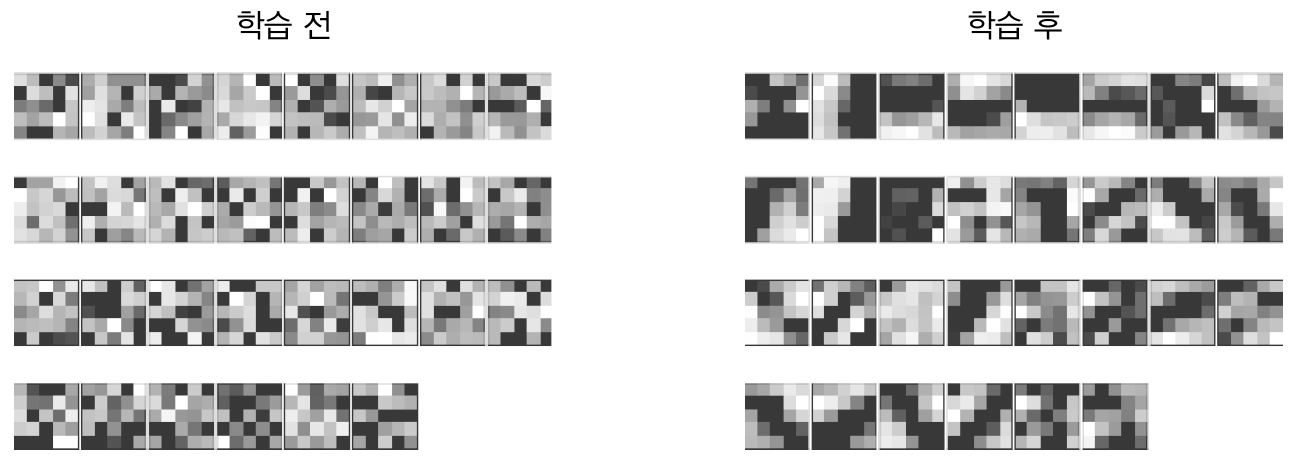

학습 전 필터는 무작위로 초기화되고 있어 흑백의 정도에 규칙성이 없지만, 학습 후 필터는 규칙성 있는 이미지가 된 것을 확인할 수 있다.

오른쪽과 같이 규칙성 있는 필터는 에지(색상이 바뀐 경계선)와 블롭(국소적으로 덩어리진 영역) 등을 보고 있다. 가령 왼쪽, 오른쪽 절반 색이 각각 다른 것은 세로 방향에 에지에 반응하는 필터인 것.

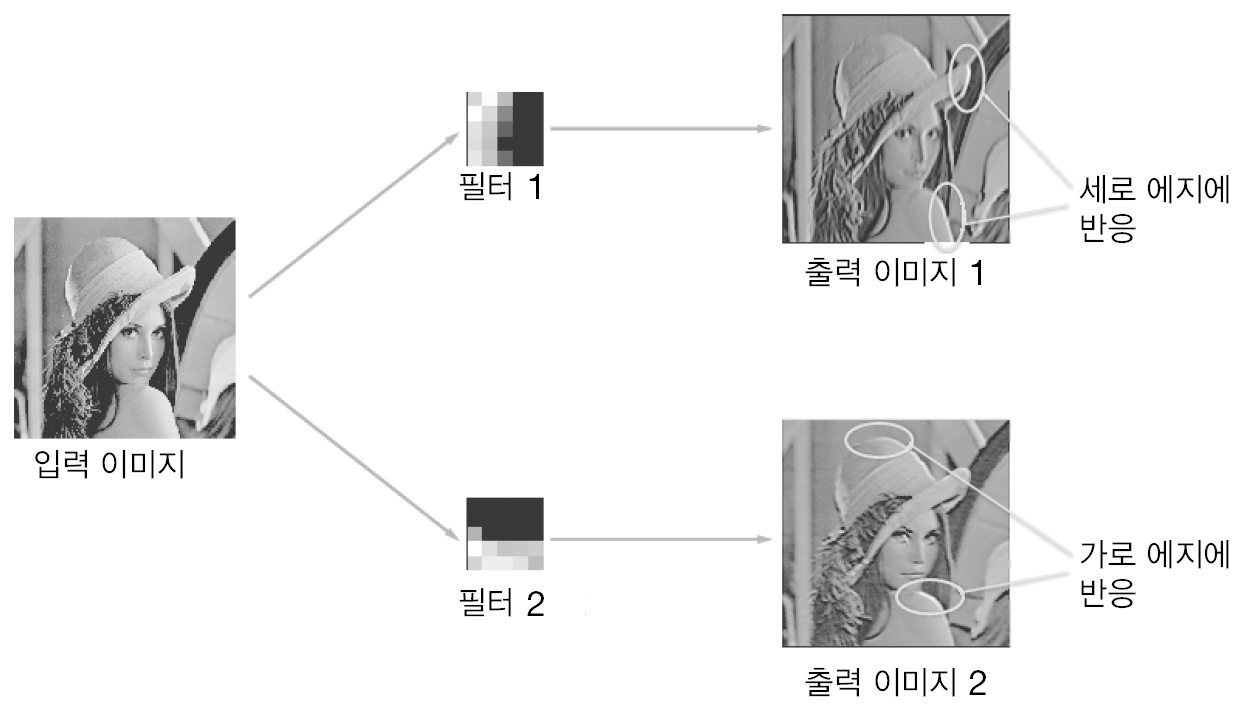

위는 학습된 필터 2개를 선택하여 입력 이미지에 합성곱 처리를 한 결과로, '필터 1'은 세로 에지에 반응, '필터 2'는 가로 에지에 반응하는 것을 알 수 있다.

이처럼 합성곱 계층의 필터는 에지나 블롭 등의 원시적인 정보를 추출할 수 있다. 이런 원시적인 정보가 뒷단 계층에 전달된다는 것이 앞에서 구현한 CNN에서 일어나는 일이다.

### 7.6.2 층 깊이에 따른 추출 정보 변화

앞 절의 결과는 1번째 층의 합성곱 계층을 대상으로 한 것이다. 1번째 층의 합성곱 계층에서는 에지나 블롭 등의 저수준 정보가 추출된다면, 그럼 겹겹이 쌓인 CNN의 각 계층에서는 어떤 정보가 추출될까? 답은 계층이 깊어질수록 추출되는 정보(정확히는 강하게 반응하는 뉴런)는 더 추상화된다는 것을 알 수 있다.

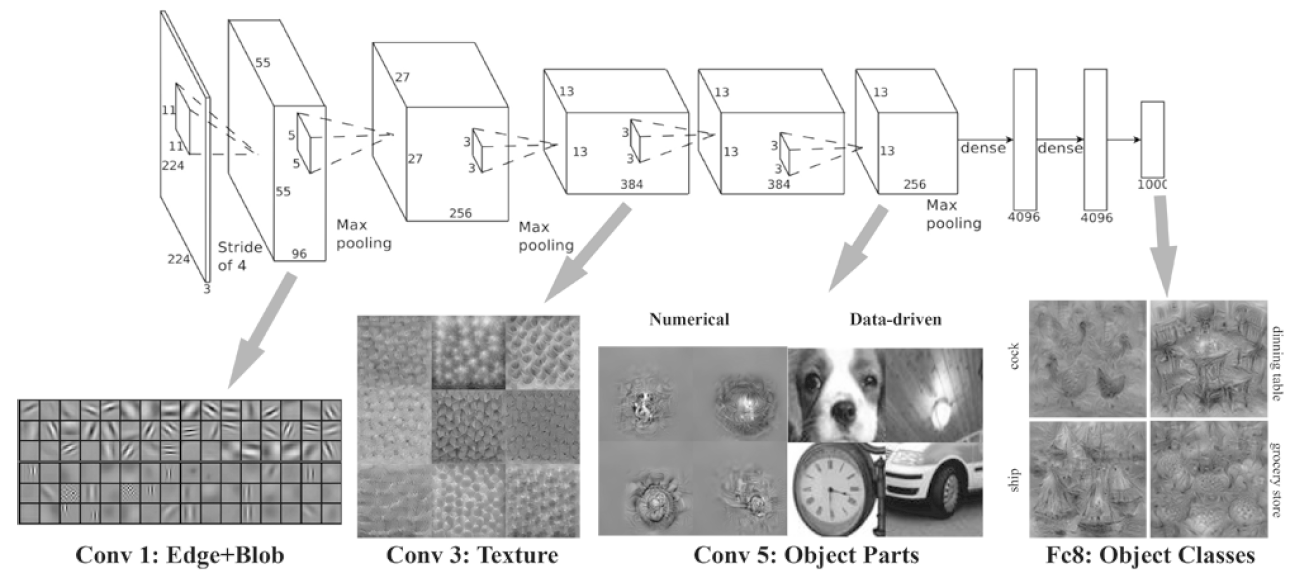

위는 일반 사물 인식(자동차나 개 등)을 수행한 8층의 CNN이다. (AlexNet) 합성곱 계층과 풀링 계층을 여러 겹 쌓고, 마지막으로 완전연결 계층을 거쳐 결과를 출력하는 구조다. 추출되는 정보는 다음과 같다.
- 1번째 층: 에지와 블롭
- 3번째 층: 텍스처
- 5번째 층: 사물의 일부
- 마지막 완전연결 층: 사물의 클래스(개, 자동차 등)에 뉴런이 반응

이렇게 합성곱 계층을 여러 겹 쌓으면, 층이 깊어지면서 더 복잡하고 추상화된 정보가 추출된다는 것이다. 즉, 층이 깊어지면서 뉴런이 반응하는 대상이 단순한 모양에서 '고급' 정보로 변화해간다. (사물의 '의미'를 이해하도록 변화한다는 의미)



## 7.7 대표적인 CNN

### 7.7.1 LeNet

LeNet은 손글씨 숫자를 인식하는 네트워크로, 1998년에 '첫 CNN'으로 제안되었다. 아래와 같이 합성곱 계층과 풀링 계층 (정확히는 단순 '원소를 줄이기'만 하는 서브샘플링 계층)을 반복하고, 마지막으로 완전연결 계층을 거치면서 결과를 출력한다.

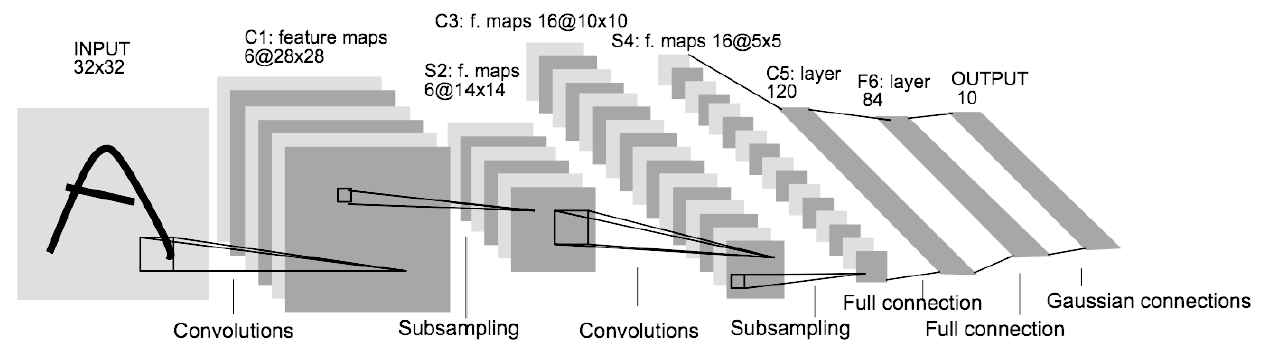

'현재의 CNN'과 비교한 차이
- 활성화 함수
  - LeNet: 시그모이드 함수
  - 현재 CNN: ReLU
- LeNet은 서브샘플링을 하여 중간 데이터의 크기를 줄이지만 현재는 최대 풀링이 주류


### 7.7.2 AlexNet

LeNet과 비교해 훨씬 최근인 2012년에 발표된 AlexNex은 LeNet과 크게 다르진 않다. AlexNet은 합성곱 계층과 풀링 계층을 거듭하며 마지막으로 완전연결 계층을 거쳐 결과를 출력한다.

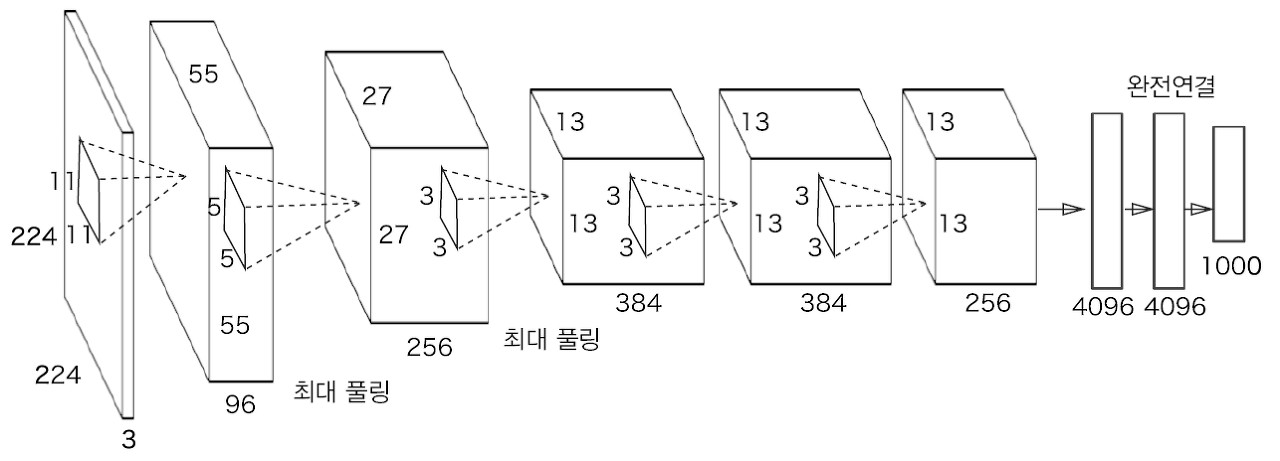

LeNet에서 AlexNet으로 변화된 점
- 활성화 함수로 ReLU 이용
- LRN(Local Response Normalization)이라는 정규적 정규화를 실시하는 계층을 이용
- 드롭아웃 사용

## 7.8 정리

- CNN은 지금까지의 완전연결 계층 네트워크에 합성곱 계층과 풀링 계층을 새로 추가한다.
- 합성곱 계층과 풀링 계층은 im2col(이미지를 행렬로 전개하는 함수)을 이용하면 간단하고 효율적으로 구현할 수 있다.
- CNN을 시각화해보면 계층이 깊어질수록 고급 정보가 추출되는 모습을 확인할 수 있다.
- 대표적인 CNN에는 LeNet과 AlexNet이 있다.
- 딥러닝의 발전에는 빅데이터와 GPU가 크게 기여했다.